In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_set=pd.read_csv("I://Hackathon//RedBus//train//train.csv")

In [3]:
train_set.head()

,doj,srcid,destid,final_seatcount
0,2023-03-01,45,46,2838.0
1,2023-03-01,46,45,2298.0
2,2023-03-01,45,47,2720.0
3,2023-03-01,47,45,2580.0
4,2023-03-01,46,9,4185.0


In [4]:
train_set.shape

(67200, 4)

### Decomposition

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition=seasonal_decompose(train_set['final_seatcount'], model='additive', period=60)

# Accessing components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

### Plotting 

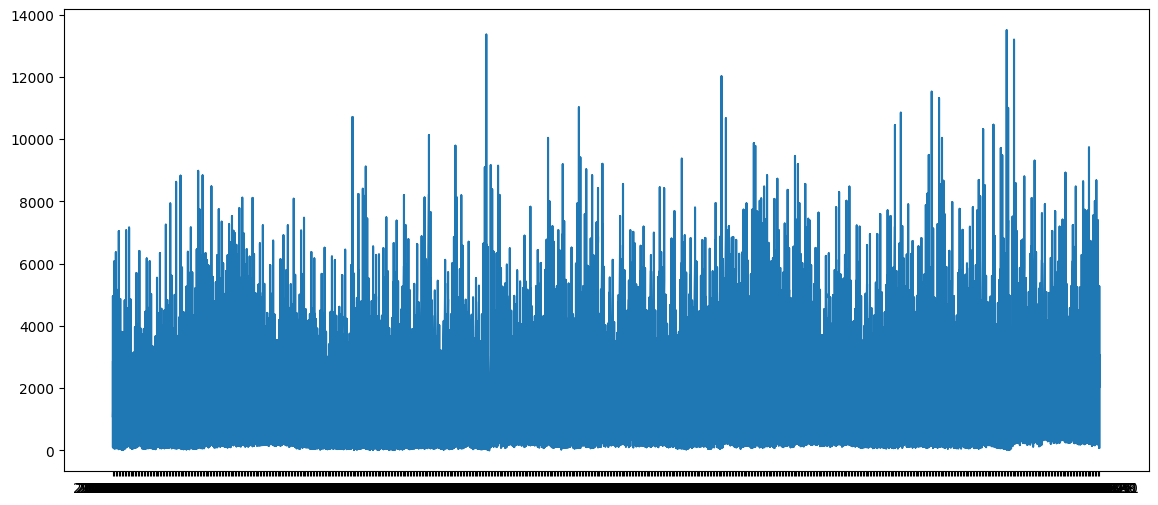

In [6]:
ax,fig=plt.subplots(figsize=(14,6))

t=train_set['doj']
y=train_set['final_seatcount']

plt.plot(t,y)

### Plotting Source & Destination Wise

In [7]:
train2=train_set  # Taking new dataset

C:\Users\arghy\AppData\Local\Temp\ipykernel_18300\3753759780.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


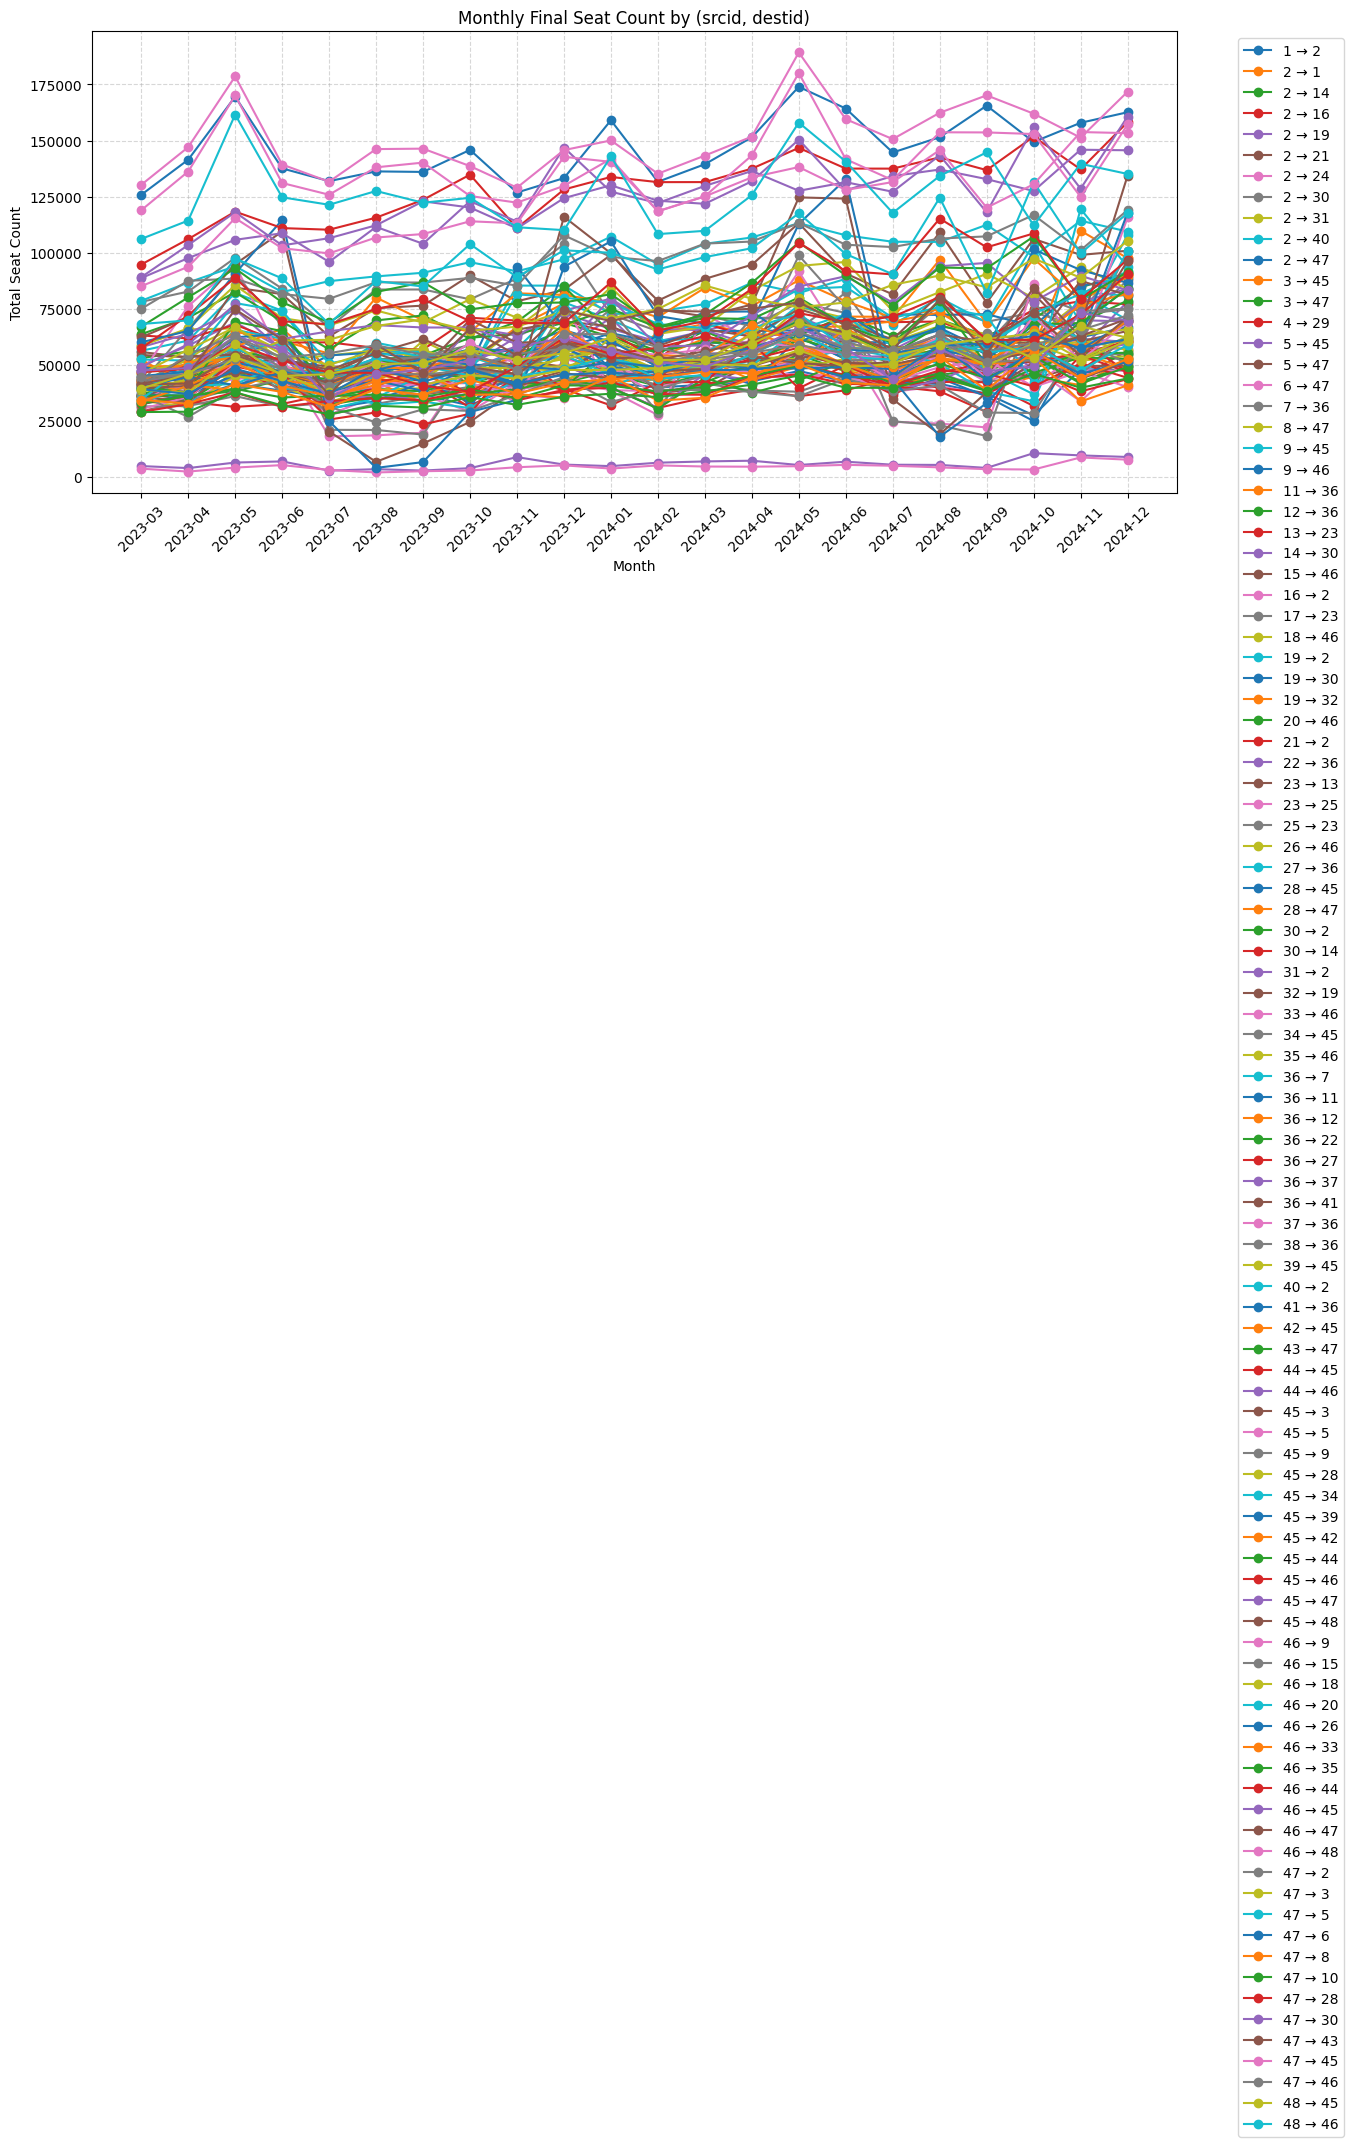

In [8]:
# Convert 'doj' to datetime
train2['doj'] = pd.to_datetime(train2['doj'])

# Create a 'Month' column for grouping
train2['Month']=train2['doj'].dt.to_period('M')

# Group by Month and (srcid, destid), and sum the seat count
grouped=train2.groupby(['Month', 'srcid', 'destid'])['final_seatcount'].sum().reset_index()

# Convert Month to string for plotting
grouped['Month'] = grouped['Month'].astype(str)

plt.figure(figsize=(14, 6))

# Loop over unique (srcid, destid) pairs and plot
for key, grp in grouped.groupby(['srcid', 'destid']):
    label = f"{key[0]} → {key[1]}"
    plt.plot(grp['Month'], grp['final_seatcount'], marker='o', label=label)

plt.title("Monthly Final Seat Count by (srcid, destid)")
plt.xlabel("Month")
plt.ylabel("Total Seat Count")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [9]:
train_set[['srcid','destid']].drop_duplicates()

,srcid,destid
0,45,46
1,46,45
2,45,47
3,47,45
4,46,9
...,...,...
95,2,24
96,44,45
97,47,10
98,38,36


Observation: There are 100 unique source and destination pairs.

In [10]:
grouped

,Month,srcid,destid,final_seatcount
0,2023-03,1,2,37425.0
1,2023-03,2,1,41995.0
2,2023-03,2,14,40805.0
3,2023-03,2,16,43345.0
4,2023-03,2,19,49520.0
...,...,...,...,...
2195,2024-12,47,43,96340.0
2196,2024-12,47,45,153294.0
2197,2024-12,47,46,71950.0
2198,2024-12,48,45,61948.0


### Adding column with indices

In [11]:
train2=train2.sort_values('Month')
train2["Time Index"]=range(len(train2))

In [12]:
train2

,doj,srcid,destid,final_seatcount,Month,Time Index
3,2023-03-01,47,45,2580.0,2023-03,0
2,2023-03-01,45,47,2720.0,2023-03,1
1,2023-03-01,46,45,2298.0,2023-03,2
0,2023-03-01,45,46,2838.0,2023-03,3
63,2023-03-01,45,5,1170.0,2023-03,4
...,...,...,...,...,...,...
67191,2024-12-31,2,14,1400.0,2024-12,67195
67192,2024-12-31,1,2,1370.0,2024-12,67196
67193,2024-12-31,17,23,1870.0,2024-12,67197
67194,2024-12-31,4,29,1095.0,2024-12,67198


#### Single Source and Destination Pattern Along with Best Fit Line

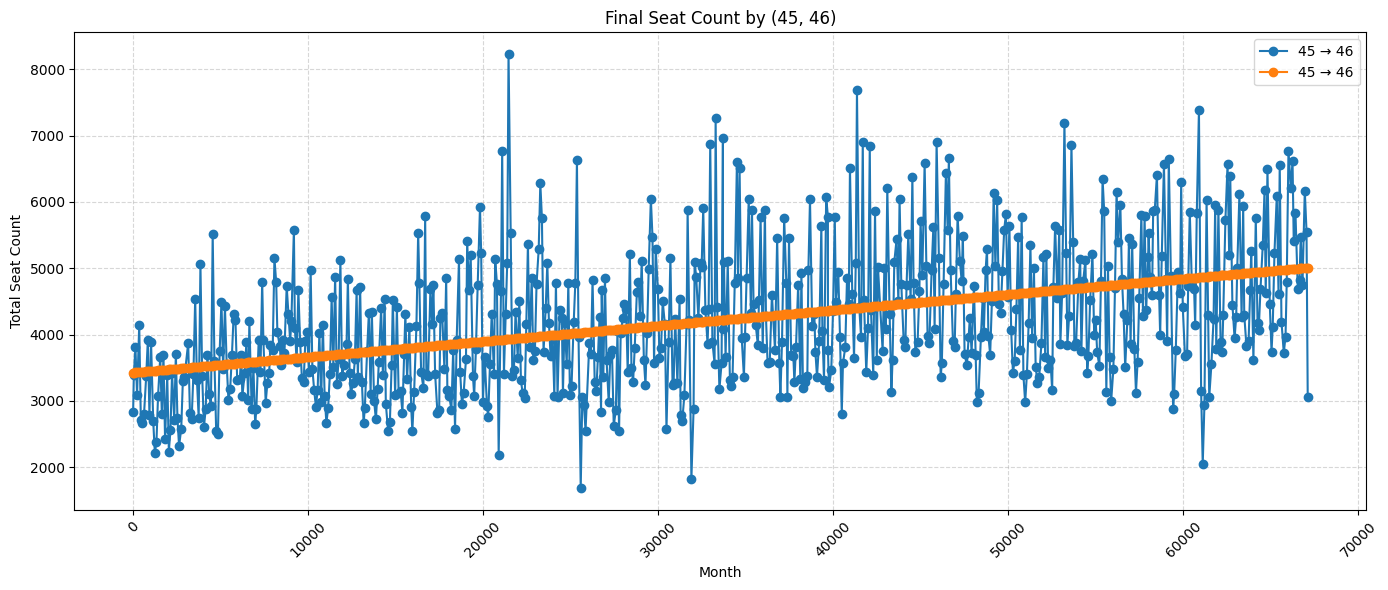

In [13]:
plt.figure(figsize=(14, 6))

src=45
dest=46

label=f"{src} → {dest}"
subset=train2[(train2['srcid']==src) & (train2['destid']==dest)]

coefficients=np.polyfit(subset['Time Index'],subset['final_seatcount'],1)  # Fitting y=mx+c
m=coefficients[0]
c=coefficients[1]
y_hat=m*subset['Time Index']+c  # Predicted 

plt.plot(subset['Time Index'],subset['final_seatcount'], marker='o', label=label)
plt.plot(subset['Time Index'],y_hat, marker='o', label=label)
    
plt.title(f"Final Seat Count by {(src, dest)}")
plt.xlabel("Month")
plt.ylabel("Total Seat Count")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### Single Source and Destination Pattern Along with Best Fit Polynomial

C:\Users\arghy\AppData\Local\Temp\ipykernel_18300\2439155921.py:13: RankWarning: Polyfit may be poorly conditioned
  coeffs=np.polyfit(x, y, degree)


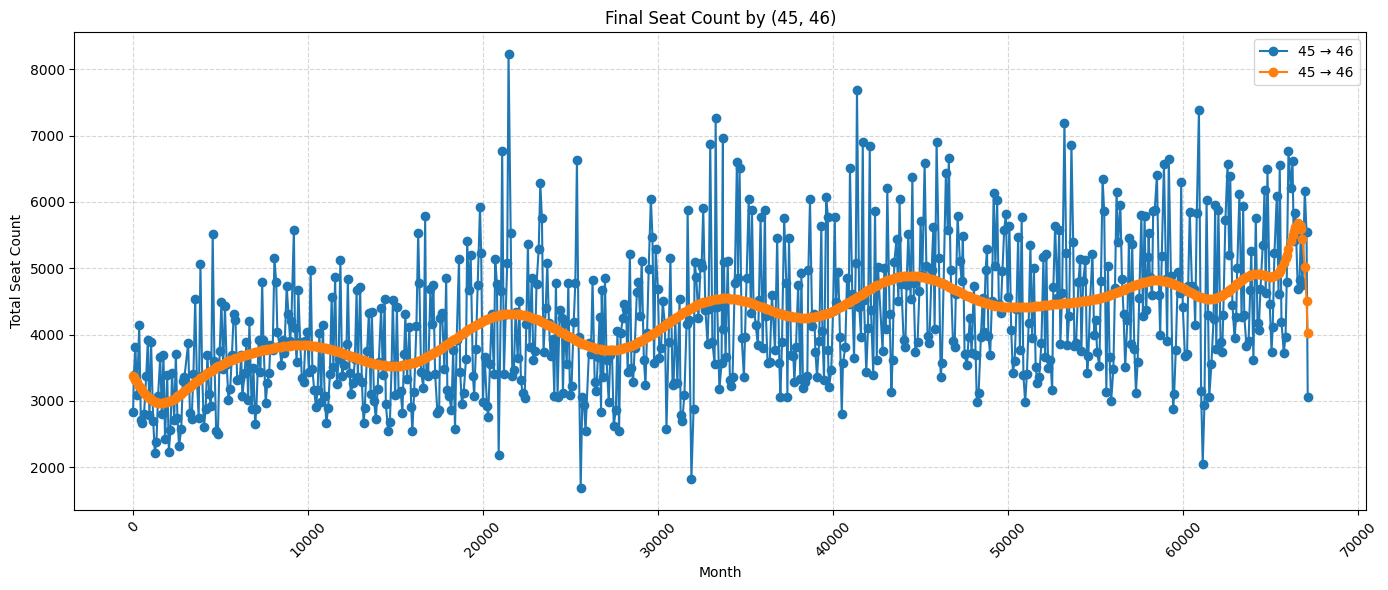

In [66]:
plt.figure(figsize=(14, 6))

src=45
dest=46

label=f"{src} → {dest}"
subset=train2[(train2['srcid']==src) & (train2['destid']==dest)]

x=subset['Time Index']
y=subset['final_seatcount']
degree=50

coeffs=np.polyfit(x, y, degree)
poly_eq=np.poly1d(coeffs)

# Predict
y_hat=poly_eq(x)

plt.plot(x,y, marker='o', label=label)
plt.plot(x,y_hat, marker='o', label=label)
    
plt.title(f"Final Seat Count by {(src, dest)}")
plt.xlabel("Month")
plt.ylabel("Total Seat Count")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [14]:
subset

,doj,srcid,destid,final_seatcount,Month,Time Index
0,2023-03-01,45,46,2838.0,2023-03,3
100,2023-03-02,45,46,3392.0,2023-03,43
200,2023-03-03,45,46,3808.0,2023-03,135
300,2023-03-04,45,46,3090.0,2023-03,227
400,2023-03-05,45,46,4144.0,2023-03,351
...,...,...,...,...,...,...
66700,2024-12-27,45,46,5478.0,2024-12,66712
66800,2024-12-28,45,46,4752.0,2024-12,66812
66900,2024-12-29,45,46,6170.0,2024-12,66944
67000,2024-12-30,45,46,5552.0,2024-12,67044


### Dividing on the basis of trend

In [15]:
l1=[]
high_trend_set=[]
moderate_trend_set=[]
no_trend_set=[]

for key,grp in grouped.groupby(['srcid','destid']):
    subset=train2[(train2['srcid']==key[0]) & (train2['destid']==key[1])]
    coefficients=np.polyfit(subset['Time Index'],subset['final_seatcount'],1)  # Fitting y=mx+c
    slope=coefficients[0]
    intercept=coefficients[1]
    if slope>=0.021:
        high_trend_set.append(key)
    elif slope>=0.012:
        moderate_trend_set.append(key)
    else:
        no_trend_set.append(key)
    l1.append(coefficients)


In [16]:
len(l1),len(high_trend_set),len(moderate_trend_set),len(no_trend_set)

(100, 8, 22, 70)

In [17]:
transaction=pd.read_csv("I://Hackathon//RedBus//train//transactions.csv")

In [18]:
transaction.head()

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd
0,2023-03-01,2023-01-30,45,46,Karnataka,Tamil Nadu,Tier 1,Tier 1,8.0,76.0,30
1,2023-03-01,2023-01-30,46,45,Tamil Nadu,Karnataka,Tier 1,Tier 1,8.0,70.0,30
2,2023-03-01,2023-01-30,45,47,Karnataka,Andhra Pradesh,Tier 1,Tier 1,4.0,142.0,30
3,2023-03-01,2023-01-30,47,45,Andhra Pradesh,Karnataka,Tier 1,Tier 1,0.0,68.0,30
4,2023-03-01,2023-01-30,46,9,Tamil Nadu,Tamil Nadu,Tier 1,Tier2,9.0,162.0,30


In [19]:
transaction.shape

(2266100, 11)

In [20]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266100 entries, 0 to 2266099
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   doj                 object 
 1   doi                 object 
 2   srcid               int64  
 3   destid              int64  
 4   srcid_region        object 
 5   destid_region       object 
 6   srcid_tier          object 
 7   destid_tier         object 
 8   cumsum_seatcount    float64
 9   cumsum_searchcount  float64
 10  dbd                 int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 190.2+ MB


In [21]:
transaction.isnull().sum()

doj                   0
doi                   0
srcid                 0
destid                0
srcid_region          0
destid_region         0
srcid_tier            0
destid_tier           0
cumsum_seatcount      0
cumsum_searchcount    0
dbd                   0
dtype: int64

In [22]:
transaction.describe()

,srcid,destid,cumsum_seatcount,cumsum_searchcount,dbd
count,2.266100e+06,2.266100e+06,2.266100e+06,2.266100e+06,2.266100e+06
mean,2.955000e+01,2.975000e+01,1.738379e+02,4.742158e+03,1.500000e+01
std,1.666996e+01,1.593887e+01,4.858925e+02,1.673550e+04,8.944274e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.475000e+01,1.575000e+01,0.000000e+00,2.080000e+02,7.000000e+00
50%,3.600000e+01,3.450000e+01,1.600000e+01,7.640000e+02,1.500000e+01
75%,4.500000e+01,4.500000e+01,1.000000e+02,2.896000e+03,2.300000e+01
max,4.800000e+01,4.800000e+01,1.350300e+04,1.677297e+06,3.000000e+01


In [23]:
transaction.duplicated().sum()

np.int64(0)

In [24]:
train_set.shape

(67200, 5)

In [25]:
df=transaction

In [26]:
df['doj']=df['doj'].astype(str)
df['srcid']=df['srcid'].astype(str)
df['destid']=df['destid'].astype(str)

In [27]:
df['Interaction']=df['doj']+"_"+df['srcid']+"_"+df['destid']

In [28]:
df.head()

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd,Interaction
0,2023-03-01,2023-01-30,45,46,Karnataka,Tamil Nadu,Tier 1,Tier 1,8.0,76.0,30,2023-03-01_45_46
1,2023-03-01,2023-01-30,46,45,Tamil Nadu,Karnataka,Tier 1,Tier 1,8.0,70.0,30,2023-03-01_46_45
2,2023-03-01,2023-01-30,45,47,Karnataka,Andhra Pradesh,Tier 1,Tier 1,4.0,142.0,30,2023-03-01_45_47
3,2023-03-01,2023-01-30,47,45,Andhra Pradesh,Karnataka,Tier 1,Tier 1,0.0,68.0,30,2023-03-01_47_45
4,2023-03-01,2023-01-30,46,9,Tamil Nadu,Tamil Nadu,Tier 1,Tier2,9.0,162.0,30,2023-03-01_46_9


In [29]:
train_set['srcid']=train_set['srcid'].astype(str)
train_set['destid']=train_set['destid'].astype(str)
train_set['doj']=train_set['doj'].astype(str)
train_set['Interaction']=train_set['doj']+"_"+train_set['srcid']+"_"+train_set['destid']

In [30]:
train=train_set[["Interaction","final_seatcount"]]

In [31]:
train.head()

,Interaction,final_seatcount
0,2023-03-01_45_46,2838.0
1,2023-03-01_46_45,2298.0
2,2023-03-01_45_47,2720.0
3,2023-03-01_47_45,2580.0
4,2023-03-01_46_9,4185.0


In [32]:
len(df['Interaction'].unique()),len(train['Interaction'].unique())

(73100, 67200)

In [33]:
ready_df=pd.merge(df,train,on="Interaction",how="left")

In [34]:
ready_df

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd,Interaction,final_seatcount
0,2023-03-01,2023-01-30,45,46,Karnataka,Tamil Nadu,Tier 1,Tier 1,8.0,76.0,30,2023-03-01_45_46,2838.0
1,2023-03-01,2023-01-30,46,45,Tamil Nadu,Karnataka,Tier 1,Tier 1,8.0,70.0,30,2023-03-01_46_45,2298.0
2,2023-03-01,2023-01-30,45,47,Karnataka,Andhra Pradesh,Tier 1,Tier 1,4.0,142.0,30,2023-03-01_45_47,2720.0
3,2023-03-01,2023-01-30,47,45,Andhra Pradesh,Karnataka,Tier 1,Tier 1,0.0,68.0,30,2023-03-01_47_45,2580.0
4,2023-03-01,2023-01-30,46,9,Tamil Nadu,Tamil Nadu,Tier 1,Tier2,9.0,162.0,30,2023-03-01_46_9,4185.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266095,2025-02-28,2025-02-28,2,24,Maharashtra and Goa,Maharashtra and Goa,Tier 1,Tier2,0.0,0.0,0,2025-02-28_2_24,NaN
2266096,2025-02-28,2025-02-28,44,45,Tamil Nadu,Karnataka,Tier2,Tier 1,0.0,0.0,0,2025-02-28_44_45,NaN
2266097,2025-02-28,2025-02-28,47,10,Andhra Pradesh,Andhra Pradesh,Tier 1,Tier 3,0.0,0.0,0,2025-02-28_47_10,NaN
2266098,2025-02-28,2025-02-28,38,36,Rest of North,Delhi,Tier 1,Tier2,0.0,0.0,0,2025-02-28_38_36,NaN


In [35]:
ready_df.isnull().sum()

doj                        0
doi                        0
srcid                      0
destid                     0
srcid_region               0
destid_region              0
srcid_tier                 0
destid_tier                0
cumsum_seatcount           0
cumsum_searchcount         0
dbd                        0
Interaction                0
final_seatcount       182900
dtype: int64

##### Observation: There is information regarding routes which is not present in the train dataset so we are keeping this portion aside

In [36]:
## Storing data for extra routes which are not present in train set
unpatterned=ready_df[ready_df['final_seatcount'].isna()]

In [37]:
unpatterned

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd,Interaction,final_seatcount
2083200,2025-01-01,2024-12-02,45,46,Karnataka,Tamil Nadu,Tier 1,Tier 1,6.0,626.0,30,2025-01-01_45_46,NaN
2083201,2025-01-01,2024-12-02,46,45,Tamil Nadu,Karnataka,Tier 1,Tier 1,22.0,620.0,30,2025-01-01_46_45,NaN
2083202,2025-01-01,2024-12-02,45,47,Karnataka,Andhra Pradesh,Tier 1,Tier 1,22.0,1136.0,30,2025-01-01_45_47,NaN
2083203,2025-01-01,2024-12-02,47,45,Andhra Pradesh,Karnataka,Tier 1,Tier 1,70.0,2140.0,30,2025-01-01_47_45,NaN
2083204,2025-01-01,2024-12-02,46,9,Tamil Nadu,Tamil Nadu,Tier 1,Tier2,9.0,768.0,30,2025-01-01_46_9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266095,2025-02-28,2025-02-28,2,24,Maharashtra and Goa,Maharashtra and Goa,Tier 1,Tier2,0.0,0.0,0,2025-02-28_2_24,NaN
2266096,2025-02-28,2025-02-28,44,45,Tamil Nadu,Karnataka,Tier2,Tier 1,0.0,0.0,0,2025-02-28_44_45,NaN
2266097,2025-02-28,2025-02-28,47,10,Andhra Pradesh,Andhra Pradesh,Tier 1,Tier 3,0.0,0.0,0,2025-02-28_47_10,NaN
2266098,2025-02-28,2025-02-28,38,36,Rest of North,Delhi,Tier 1,Tier2,0.0,0.0,0,2025-02-28_38_36,NaN


In [38]:
patterned=ready_df.dropna()  ## Proper Clean Data 

In [39]:
patterned

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd,Interaction,final_seatcount
0,2023-03-01,2023-01-30,45,46,Karnataka,Tamil Nadu,Tier 1,Tier 1,8.0,76.0,30,2023-03-01_45_46,2838.0
1,2023-03-01,2023-01-30,46,45,Tamil Nadu,Karnataka,Tier 1,Tier 1,8.0,70.0,30,2023-03-01_46_45,2298.0
2,2023-03-01,2023-01-30,45,47,Karnataka,Andhra Pradesh,Tier 1,Tier 1,4.0,142.0,30,2023-03-01_45_47,2720.0
3,2023-03-01,2023-01-30,47,45,Andhra Pradesh,Karnataka,Tier 1,Tier 1,0.0,68.0,30,2023-03-01_47_45,2580.0
4,2023-03-01,2023-01-30,46,9,Tamil Nadu,Tamil Nadu,Tier 1,Tier2,9.0,162.0,30,2023-03-01_46_9,4185.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083195,2024-12-31,2024-12-31,2,24,Maharashtra and Goa,Maharashtra and Goa,Tier 1,Tier2,800.0,34460.0,0,2024-12-31_2_24,800.0
2083196,2024-12-31,2024-12-31,44,45,Tamil Nadu,Karnataka,Tier2,Tier 1,1360.0,25295.0,0,2024-12-31_44_45,1360.0
2083197,2024-12-31,2024-12-31,47,10,Andhra Pradesh,Andhra Pradesh,Tier 1,Tier 3,560.0,26570.0,0,2024-12-31_47_10,560.0
2083198,2024-12-31,2024-12-31,38,36,Rest of North,Delhi,Tier 1,Tier2,535.0,18065.0,0,2024-12-31_38_36,535.0


In [40]:
## Since srcid and destid imply (srcid_region & srcid_tier) and (destid_region & destid_tier) respectively, we are eliminating the latter
## Since dbd=doj-doi, we are not using doi column for model building
fresh_df=patterned[['doj','srcid','destid','cumsum_seatcount','cumsum_searchcount','dbd','final_seatcount']]

In [41]:
fresh_df

,doj,srcid,destid,cumsum_seatcount,cumsum_searchcount,dbd,final_seatcount
0,2023-03-01,45,46,8.0,76.0,30,2838.0
1,2023-03-01,46,45,8.0,70.0,30,2298.0
2,2023-03-01,45,47,4.0,142.0,30,2720.0
3,2023-03-01,47,45,0.0,68.0,30,2580.0
4,2023-03-01,46,9,9.0,162.0,30,4185.0
...,...,...,...,...,...,...,...
2083195,2024-12-31,2,24,800.0,34460.0,0,800.0
2083196,2024-12-31,44,45,1360.0,25295.0,0,1360.0
2083197,2024-12-31,47,10,560.0,26570.0,0,560.0
2083198,2024-12-31,38,36,535.0,18065.0,0,535.0


### Modules for model training

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
RMSE=[]
for key,grp in grouped.groupby(['srcid','destid']):
    subset=fresh_df[(fresh_df['srcid']==str(key[0])) & (fresh_df['destid']==str(key[1]))]
    
    ## since for each subset srcid and destid are fixed so we are eliminating
    set1=subset[['doj','cumsum_seatcount','cumsum_searchcount','dbd','final_seatcount']]

    ## Train Test Split
    x_train,x_test,y_train,y_test=train_test_split(set1.drop('final_seatcount',axis=1), set1['final_seatcount'], shuffle=False, test_size=0.2)

    ## RandomForest
    rf=RandomForestRegressor()
    rf.fit(x_train,y_train)
    y_hat=rf.predict(x_test)
    rmse=mean_squared_error(y_test,y_hat)
    print(f"RMSE:{rmse:.2f}")
    RMSE.append(rmse)

In [44]:
unpatterned

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd,Interaction,final_seatcount
2083200,2025-01-01,2024-12-02,45,46,Karnataka,Tamil Nadu,Tier 1,Tier 1,6.0,626.0,30,2025-01-01_45_46,NaN
2083201,2025-01-01,2024-12-02,46,45,Tamil Nadu,Karnataka,Tier 1,Tier 1,22.0,620.0,30,2025-01-01_46_45,NaN
2083202,2025-01-01,2024-12-02,45,47,Karnataka,Andhra Pradesh,Tier 1,Tier 1,22.0,1136.0,30,2025-01-01_45_47,NaN
2083203,2025-01-01,2024-12-02,47,45,Andhra Pradesh,Karnataka,Tier 1,Tier 1,70.0,2140.0,30,2025-01-01_47_45,NaN
2083204,2025-01-01,2024-12-02,46,9,Tamil Nadu,Tamil Nadu,Tier 1,Tier2,9.0,768.0,30,2025-01-01_46_9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266095,2025-02-28,2025-02-28,2,24,Maharashtra and Goa,Maharashtra and Goa,Tier 1,Tier2,0.0,0.0,0,2025-02-28_2_24,NaN
2266096,2025-02-28,2025-02-28,44,45,Tamil Nadu,Karnataka,Tier2,Tier 1,0.0,0.0,0,2025-02-28_44_45,NaN
2266097,2025-02-28,2025-02-28,47,10,Andhra Pradesh,Andhra Pradesh,Tier 1,Tier 3,0.0,0.0,0,2025-02-28_47_10,NaN
2266098,2025-02-28,2025-02-28,38,36,Rest of North,Delhi,Tier 1,Tier2,0.0,0.0,0,2025-02-28_38_36,NaN


In [54]:
print(patterned[['srcid','destid']].drop_duplicates().shape)
print(unpatterned[['srcid','destid']].drop_duplicates().shape)

(100, 2)
(100, 2)


##### Observation: There are unique routes in both patterned and unpatterned sets

### Prediction for Unpatterned Data

In [ ]:
for key,grp in grouped.groupby(['srcid','destid']):
    subset=train2[(train2['srcid']==key[0]) & (train2['destid']==key[1])]
    
    x=subset['Time Index']
    y=subset['final_seatcount']
    degree=50

    coeffs=np.polyfit(x, y, degree)
    poly_eq=np.poly1d(coeffs)

    # Predict
    y_hat=poly_eq(x)

### New Merged Dataset

In [71]:
ready_df['SeatCount']=ready_df.groupby(['doj','srcid','destid'])['cumsum_seatcount'].transform('max')

In [75]:
ready_df

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd,Interaction,final_seatcount,final_seacount,SeatCount
0,2023-03-01,2023-01-30,45,46,Karnataka,Tamil Nadu,Tier 1,Tier 1,8.0,76.0,30,2023-03-01_45_46,2838.0,2838.0,2838.0
1,2023-03-01,2023-01-30,46,45,Tamil Nadu,Karnataka,Tier 1,Tier 1,8.0,70.0,30,2023-03-01_46_45,2298.0,2298.0,2298.0
2,2023-03-01,2023-01-30,45,47,Karnataka,Andhra Pradesh,Tier 1,Tier 1,4.0,142.0,30,2023-03-01_45_47,2720.0,2720.0,2720.0
3,2023-03-01,2023-01-30,47,45,Andhra Pradesh,Karnataka,Tier 1,Tier 1,0.0,68.0,30,2023-03-01_47_45,2580.0,2580.0,2580.0
4,2023-03-01,2023-01-30,46,9,Tamil Nadu,Tamil Nadu,Tier 1,Tier2,9.0,162.0,30,2023-03-01_46_9,4185.0,4185.0,4185.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266095,2025-02-28,2025-02-28,2,24,Maharashtra and Goa,Maharashtra and Goa,Tier 1,Tier2,0.0,0.0,0,2025-02-28_2_24,NaN,25.0,25.0
2266096,2025-02-28,2025-02-28,44,45,Tamil Nadu,Karnataka,Tier2,Tier 1,0.0,0.0,0,2025-02-28_44_45,NaN,45.0,45.0
2266097,2025-02-28,2025-02-28,47,10,Andhra Pradesh,Andhra Pradesh,Tier 1,Tier 3,0.0,0.0,0,2025-02-28_47_10,NaN,0.0,0.0
2266098,2025-02-28,2025-02-28,38,36,Rest of North,Delhi,Tier 1,Tier2,0.0,0.0,0,2025-02-28_38_36,NaN,5.0,5.0


In [77]:
merged_df=ready_df.drop(['final_seatcount','final_seacount'],axis=1).copy()

In [78]:
merged_df

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd,Interaction,SeatCount
0,2023-03-01,2023-01-30,45,46,Karnataka,Tamil Nadu,Tier 1,Tier 1,8.0,76.0,30,2023-03-01_45_46,2838.0
1,2023-03-01,2023-01-30,46,45,Tamil Nadu,Karnataka,Tier 1,Tier 1,8.0,70.0,30,2023-03-01_46_45,2298.0
2,2023-03-01,2023-01-30,45,47,Karnataka,Andhra Pradesh,Tier 1,Tier 1,4.0,142.0,30,2023-03-01_45_47,2720.0
3,2023-03-01,2023-01-30,47,45,Andhra Pradesh,Karnataka,Tier 1,Tier 1,0.0,68.0,30,2023-03-01_47_45,2580.0
4,2023-03-01,2023-01-30,46,9,Tamil Nadu,Tamil Nadu,Tier 1,Tier2,9.0,162.0,30,2023-03-01_46_9,4185.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266095,2025-02-28,2025-02-28,2,24,Maharashtra and Goa,Maharashtra and Goa,Tier 1,Tier2,0.0,0.0,0,2025-02-28_2_24,25.0
2266096,2025-02-28,2025-02-28,44,45,Tamil Nadu,Karnataka,Tier2,Tier 1,0.0,0.0,0,2025-02-28_44_45,45.0
2266097,2025-02-28,2025-02-28,47,10,Andhra Pradesh,Andhra Pradesh,Tier 1,Tier 3,0.0,0.0,0,2025-02-28_47_10,0.0
2266098,2025-02-28,2025-02-28,38,36,Rest of North,Delhi,Tier 1,Tier2,0.0,0.0,0,2025-02-28_38_36,5.0


In [89]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import holidays
import optuna

In [90]:
def enrich(df):
    df=df.copy()
    df['doj'] = pd.to_datetime(df['doj'], errors='coerce')
    df["doj_dow"] = df["doj"].dt.dayofweek
    df["is_weekend"] = df["doj_dow"].isin([5, 6]).astype(int)
    df["doj_year"] = df["doj"].dt.year
    df["doj_month"] = df["doj"].dt.month
    df["doj_day"] = df["doj"].dt.day

    df["search_per_seat"] = df["cumsum_searchcount"] / (df["cumsum_seatcount"] + 1)
    df["seat_to_search_ratio"] = (df["cumsum_seatcount"] + 1) / (df["cumsum_searchcount"] + 1)

    # Velocity (difference) per route if needed
    df["booking_velocity"] = df.groupby(['srcid', 'destid'])["cumsum_seatcount"].diff().fillna(0)
    df["search_velocity"] = df.groupby(['srcid', 'destid'])["cumsum_searchcount"].diff().fillna(0)

    # Monthly trends
    df["month_search_avg"] = df.groupby("doj_month")["cumsum_searchcount"].transform("mean")
    df["month_booking_avg"] = df.groupby("doj_month")["cumsum_seatcount"].transform("mean")
    
    # --- Cyclical encodings ---
    df['day_sin'] = np.sin(2 * np.pi * df['doj_day'] / 31)
    df['day_cos'] = np.cos(2 * np.pi * df['doj_day'] / 31)

    df['month_sin'] = np.sin(2 * np.pi * df['doj_month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['doj_month'] / 12)

    df['dow_sin'] = np.sin(2 * np.pi * df['doj_dow'] / 7)
    df['dow_cos'] = np.cos(2 * np.pi * df['doj_dow'] / 7)

    # Add holiday flag
    indian_holidays = holidays.India(years=range(df['doj'].dt.year.min(), df['doj'].dt.year.max() + 1))
    df['is_holiday'] = df['doj'].apply(lambda x: 1 if x in indian_holidays else 0)
    return df
    
filtered_df=enrich(merged_df)
cat_cols = ['srcid','destid']
label_encoders={}
for col in cat_cols:

    le = LabelEncoder()
    filtered_df[col] = le.fit_transform(filtered_df[col].astype(str))
    label_encoders[col] = le

features = [
    "cumsum_seatcount", "cumsum_searchcount", "search_per_seat",
    "booking_velocity", "search_velocity", "dow_sin",'dow_cos', "month_sin", "month_cos","day_sin", "day_cos", "is_weekend",
    "seat_to_search_ratio", "month_search_avg", "month_booking_avg", "dbd", "is_holiday"
] + cat_cols

X = filtered_df[features]
y = filtered_df["SeatCount"]


def objective(trial):
    params = {
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 5, 15),
        "n_estimators": 1000,
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-3, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-3, 10.0, log=True),
        "tree_method": "hist",
        "random_state": 42,
        "eval_metric": "rmse"
    }

    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    rmse_scores = []

    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model = xgb.XGBRegressor(**params)

        model.fit(
            X_train, y_train,
            eval_set=[(X_val, y_val)],
            verbose=False
        )

        preds = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, preds))
        rmse_scores.append(rmse)

    return np.mean(rmse_scores)

#Run the Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

print("Best hyperparameters:", study.best_params)


[I 2025-07-21 21:46:33,291] A new study created in memory with name: no-name-1cb4ea1d-3061-445a-888f-f825ab8b483b
[I 2025-07-21 21:48:54,494] Trial 0 finished with value: 541.900272122604 and parameters: {'learning_rate': 0.019592985078294517, 'max_depth': 5, 'subsample': 0.675427026783666, 'colsample_bytree': 0.9817369923019185, 'reg_alpha': 1.239555183405418, 'reg_lambda': 0.15863281014870118}. Best is trial 0 with value: 541.900272122604.
[I 2025-07-21 21:54:17,997] Trial 1 finished with value: 350.11139670283313 and parameters: {'learning_rate': 0.009159654010428479, 'max_depth': 11, 'subsample': 0.604319369059166, 'colsample_bytree': 0.7207158164359118, 'reg_alpha': 0.005780762308241533, 'reg_lambda': 1.4129405283147682}. Best is trial 1 with value: 350.11139670283313.
[I 2025-07-21 21:57:23,594] Trial 2 finished with value: 560.5016346105017 and parameters: {'learning_rate': 0.006180562628504165, 'max_depth': 7, 'subsample': 0.6709807672304812, 'colsample_bytree': 0.8367080422540

Best hyperparameters: {'learning_rate': 0.06783194920860948, 'max_depth': 12, 'subsample': 0.6160831597524378, 'colsample_bytree': 0.9916479204926487, 'reg_alpha': 1.316253666809793, 'reg_lambda': 0.11459075843254866}


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder without dropping any categories
ohe=OneHotEncoder(drop=None,sparse_output=True)

# Fit and transform the 'Tier' column
tier_encoded=ohe.fit_transform(ready_df[['Tier']])

# Get the column names from the encoder
tier_columns=ohe.get_feature_names_out(['Tier'])

# Convert the encoded array to a DataFrame with appropriate column names
tier_encoded_df=pd.DataFrame.sparse.from_spmatrix(tier_encoded,columns=tier_columns)

# Concatenate the encoded DataFrame with the original dataset, dropping the original 'Interaction' column
dataset=pd.concat([ready_df.drop('Tier',axis=1),tier_encoded_df],axis=1)

# Display the result
dataset.head()

In [ ]:
fresh_df=dataset.drop(columns=["Interaction","srcid_tier","destid_tier"])
fresh_df.head()

In [ ]:
fresh_df.shape

In [ ]:
fresh_df.isnull().sum()

In [ ]:
fresh_df=fresh_df.dropna(subset=['final_seatcount'])

In [ ]:
fresh_df.isnull().sum()

In [ ]:
fresh_df.info()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X=fresh_df.drop(columns=['final_seatcount'])  
Y=fresh_df['final_seatcount']

# Since there are sparse features:
from scipy.sparse import csr_matrix
X=csr_matrix(X)

In [ ]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=10)
}

In [ ]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    r2 = r2_score(y_test, y_pred)

    rmse = mean_squared_error(y_test, y_pred, squared=False)

    print(f"{name}:R²={r2:.4f}, RMSE={rmse:.4f}")